# Инструменты и библиотеки языка python для анализа данных

## Python

Python -- динамически типизированный интерпретируемый язык общего назначения

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Импорт библиотек

In [2]:
import requests
import json

Структуры данных: словарь, список
Control flow: while, for

In [4]:
url = "http://swapi.co/api/planets/?page=1"

planets = []
while url:
    r = requests.get(url)
    data = json.loads(r.text)
    for i in data['results']:
        result = {}
        result['name'] = i['name']
        result['diameter'] = int(i['diameter']) if i['diameter'] != 'unknown' else None
        result['population'] = int(i['population']) if i['population'] != 'unknown' else None
        planets.append(result)
        print data
        print result['name'], result['diameter']
    url = data['next']

{u'count': 61, u'previous': None, u'results': [{u'diameter': u'12500', u'climate': u'temperate', u'surface_water': u'40', u'name': u'Alderaan', u'created': u'2014-12-10T11:35:48.479000Z', u'url': u'http://swapi.co/api/planets/2/', u'rotation_period': u'24', u'edited': u'2014-12-20T20:58:18.420000Z', u'terrain': u'grasslands, mountains', u'gravity': u'1 standard', u'orbital_period': u'364', u'films': [u'http://swapi.co/api/films/6/', u'http://swapi.co/api/films/1/'], u'residents': [u'http://swapi.co/api/people/5/', u'http://swapi.co/api/people/68/', u'http://swapi.co/api/people/81/'], u'population': u'2000000000'}, {u'diameter': u'10200', u'climate': u'temperate, tropical', u'surface_water': u'8', u'name': u'Yavin IV', u'created': u'2014-12-10T11:37:19.144000Z', u'url': u'http://swapi.co/api/planets/3/', u'rotation_period': u'24', u'edited': u'2014-12-20T20:58:18.421000Z', u'terrain': u'jungle, rainforests', u'gravity': u'1 standard', u'orbital_period': u'4818', u'films': [u'http://swap

Работа с элементами списка

In [8]:
print "Number of planets: %d" % len(planets)
print "First planet: %s" % planets[0]
print "First two planets: %s" % planets[0:2]

Number of planets: 61
First planet: {'diameter': 12500, 'name': u'Alderaan', 'population': 2000000000}
First two planets: [{'diameter': 12500, 'name': u'Alderaan', 'population': 2000000000}, {'diameter': 10200, 'name': u'Yavin IV', 'population': 1000}]


Создание классов

In [9]:
import math

class Planet:
    
    def __init__(self, diameter, name, population):
        self.diameter = diameter
        self.name = name
        self.population = population
        
    def area(self):
        return math.pi * self.diameter**2
    
planet = Planet(12500 , "Alderaan", 2000000000)
print "Area of %s is %.2f" % (planet.name, planet.area())

Area of Alderaan is 490873852.12


Функциональные элементы

In [11]:
big_planets = filter(lambda p: p["diameter"] > 12500, planets)
print "Number of big planets is %d" % len(big_planets)

areas = map(
    lambda p: Planet(p["diameter"], p["name"], p["population"]).area(), 
    filter(lambda p: p["diameter"] is not None, planets)
)
print "First two areas: %s" % areas[0:2]

Number of big planets is 15
First two areas: [490873852.12340516, 326851299.6794821]


## Pandas

Библиотека для обработки данных. Основные структуры: Series и DataFrame

In [13]:
import pandas as pd

df = pd.DataFrame(planets, columns=["name", "diameter", "population"])
print "Created data frame with %s planets" % (df.shape,)
df.head()

Created data frame with (61, 3) planets


,name,diameter,population
0,Alderaan,12500,2000000000
1,Yavin IV,10200,1000
2,Hoth,7200,NaN
3,Dagobah,8900,NaN
4,Bespin,118000,6000000


Фильтрация

In [14]:
filtered_df = df[pd.notnull(df["diameter"]) & pd.notnull(df["population"])]
print "%s planets remains after filter" % (filtered_df.shape,)

(39, 3) planets remains after filter


Сохранение на диск

In [15]:
filtered_df.to_csv("planets.csv")

Чтение с диска

In [16]:
read_df = pd.read_csv("planets.csv", index_col=0)
print "Read data frame with %s planets" % (read_df.shape,)
read_df.head()

Read data frame with (39, 3) planets


,name,diameter,population
0,Alderaan,12500,2000000000
1,Yavin IV,10200,1000
4,Bespin,118000,6000000
5,Endor,4900,30000000
6,Naboo,12120,4500000000


## Numpy

Библиотека для работы с многомерными массивами.

In [18]:
import numpy as np

x = read_df[['diameter', 'population']].values
x

array([[  1.25000000e+04,   2.00000000e+09],
       [  1.02000000e+04,   1.00000000e+03],
       [  1.18000000e+05,   6.00000000e+06],
       [  4.90000000e+03,   3.00000000e+07],
       [  1.21200000e+04,   4.50000000e+09],
       [  1.22400000e+04,   1.00000000e+12],
       [  1.97200000e+04,   1.00000000e+09],
       [  1.13700000e+04,   1.00000000e+11],
       [  1.29000000e+04,   9.50000000e+07],
       [  4.20000000e+03,   2.00000000e+04],
       [  1.27650000e+04,   4.50000000e+07],
       [  0.00000000e+00,   1.00000000e+06],
       [  1.00880000e+04,   1.90000000e+07],
       [  9.10000000e+03,   8.50000000e+06],
       [  0.00000000e+00,   1.00000000e+07],
       [  1.49200000e+04,   1.40000000e+09],
       [  1.34900000e+04,   2.20000000e+10],
       [  1.10000000e+04,   3.00000000e+09],
       [  7.54900000e+03,   1.30000000e+09],
       [  1.21500000e+04,   7.00000000e+09],
       [  9.83000000e+03,   1.00000000e+03],
       [  6.40000000e+03,   6.20000000e+07],
       [  

In [20]:
z = x / 10**3
z

array([[  1.25000000e+01,   2.00000000e+06],
       [  1.02000000e+01,   1.00000000e+00],
       [  1.18000000e+02,   6.00000000e+03],
       [  4.90000000e+00,   3.00000000e+04],
       [  1.21200000e+01,   4.50000000e+06],
       [  1.22400000e+01,   1.00000000e+09],
       [  1.97200000e+01,   1.00000000e+06],
       [  1.13700000e+01,   1.00000000e+08],
       [  1.29000000e+01,   9.50000000e+04],
       [  4.20000000e+00,   2.00000000e+01],
       [  1.27650000e+01,   4.50000000e+04],
       [  0.00000000e+00,   1.00000000e+03],
       [  1.00880000e+01,   1.90000000e+04],
       [  9.10000000e+00,   8.50000000e+03],
       [  0.00000000e+00,   1.00000000e+04],
       [  1.49200000e+01,   1.40000000e+06],
       [  1.34900000e+01,   2.20000000e+07],
       [  1.10000000e+01,   3.00000000e+06],
       [  7.54900000e+00,   1.30000000e+06],
       [  1.21500000e+01,   7.00000000e+06],
       [  9.83000000e+00,   1.00000000e+00],
       [  6.40000000e+00,   6.20000000e+04],
       [  

In [21]:
s = np.dot(z[:10].T, z[:10])
s

array([[  1.52072173e+04,   1.34783406e+10],
       [  1.34783406e+10,   1.01002526e+18]])

In [22]:
np.linalg.det(s)

1.5178007941542595e+22

## Matplotlib

Populating the interactive namespace from numpy and matplotlib


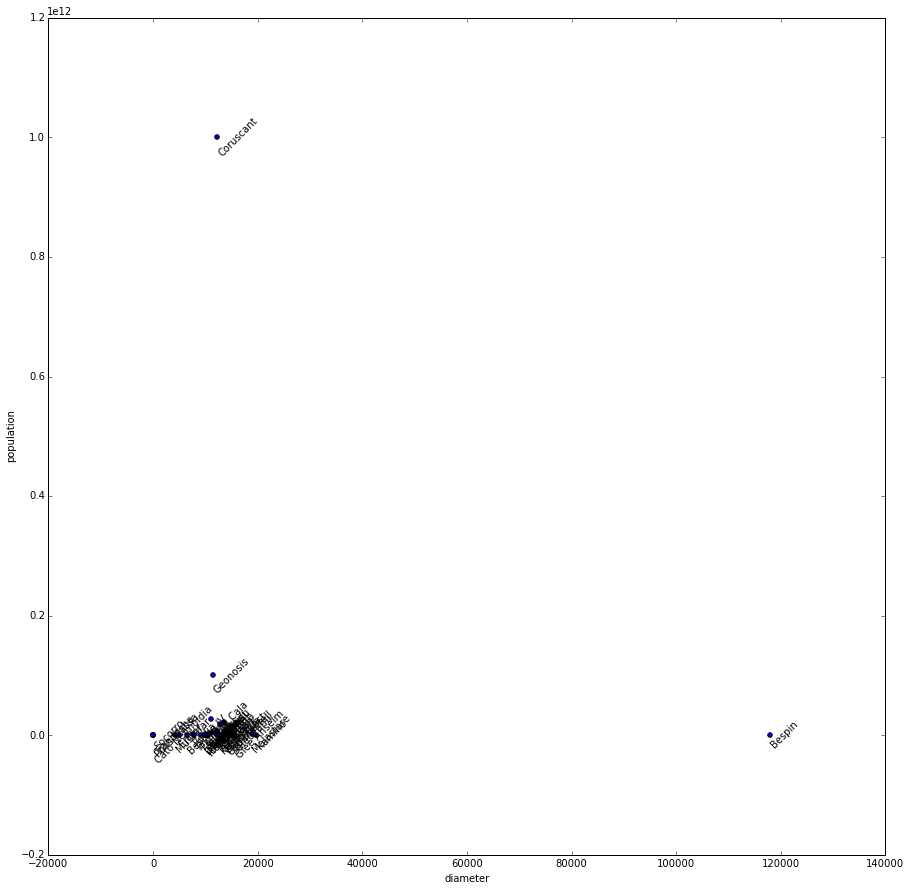

In [23]:
import pylab as pl
%pylab inline

pl.figure(figsize=(15, 15))
pl.scatter(x[:, 0], x[:, 1])
for i in xrange(x.shape[0]):
    pl.text(x[i, 0], x[i, 1], read_df["name"].iloc[i], rotation=45, ha="left", va="center")
pl.xlabel("diameter")
pl.ylabel("population")
pl.show()